In [1]:
%matplotlib notebook 

import numpy
import scipy.spatial.distance
import matplotlib.pyplot as plot

In [2]:
import matplotlib
matplotlib.rc('text', usetex=True)

In [11]:
numpy.random.seed(1234)

In [12]:
from sklearn.datasets import make_blobs

def label_map(y_, from_, to_):
    y = numpy.copy(y_)
    for f in from_:
        y[y_ == f] = to_
    return y

n_dim = 2
x_tra, y_tra = make_blobs(n_samples=100, n_features=n_dim, centers=[[1,1],[-1,-1],[1,-1],[-1,1]], shuffle=True, cluster_std=0.3)
x_tes, y_tes = make_blobs(n_samples=100, n_features=n_dim, centers=[[1,1],[-1,-1],[1,-1],[-1,1]], shuffle=True, cluster_std=0.3)

y_tra = label_map(y_tra, [0, 1], 0)
y_tra = label_map(y_tra, [2, 3], 1)
y_tes = label_map(y_tes, [0, 1], 0)
y_tes = label_map(y_tes, [2, 3], 1)

In [13]:
def knn_classify(x_, x, y, metric='euclidean', k=1):
    if len(x_.shape) < 2:
        x_ = x_.reshape([1,-1])
    dists = scipy.spatial.distance.cdist(x_, x, metric)
    sidx = numpy.argpartition(dists, k, axis=1)[:,:k]
    y_ = numpy.zeros(len(x_))
    for ii, xx_ in enumerate(x_):
        yy_, yc_ = numpy.unique(y[sidx[ii,:]], return_counts=True)
        y_[ii] = yy_[numpy.argmax(yc_)]
    return y_

In [25]:
k = 20
metric = 'euclidean'

In [26]:
# visualize data 
def vis_data(x, y = None, c='r'):
    if y is None: 
        y = [None] * len(x)
    plot.hold('on')
    for x_, y_ in zip(x, y):
        if y_ is None:
            plot.plot(x_[0], x_[1], 'o', markerfacecolor='none', markeredgecolor=c)
        else:
            plot.plot(x_[0], x_[1], c+'o' if y_ == 0 else c+'+')
    plot.hold('off')
    plot.grid('on')

In [27]:
def vis_decision_boundary(typ='k--'):
    plot.hold('on')

    lim0 = plot.gca().get_xlim()
    lim1 = plot.gca().get_ylim()
    
    x_ = numpy.linspace(lim0[0], lim0[1], 100)
    y_ = numpy.linspace(lim1[0], lim1[1], 100)
    xx, yy = numpy.meshgrid(x_, y_)
    
    pred = knn_classify(numpy.concatenate([xx.ravel()[:,None], yy.ravel()[:,None]], axis=1), x_tra, y_tra, metric, k)
    
    plt1 = plot.contourf(xx, yy, pred.reshape(xx.shape), cmap=plot.cm.coolwarm, alpha=0.4)

    plot.gca().set_xlim(lim0)
    plot.gca().set_ylim(lim1)
    
    plot.hold('off')
    
    return plt1

<IPython.core.display.Javascript object>


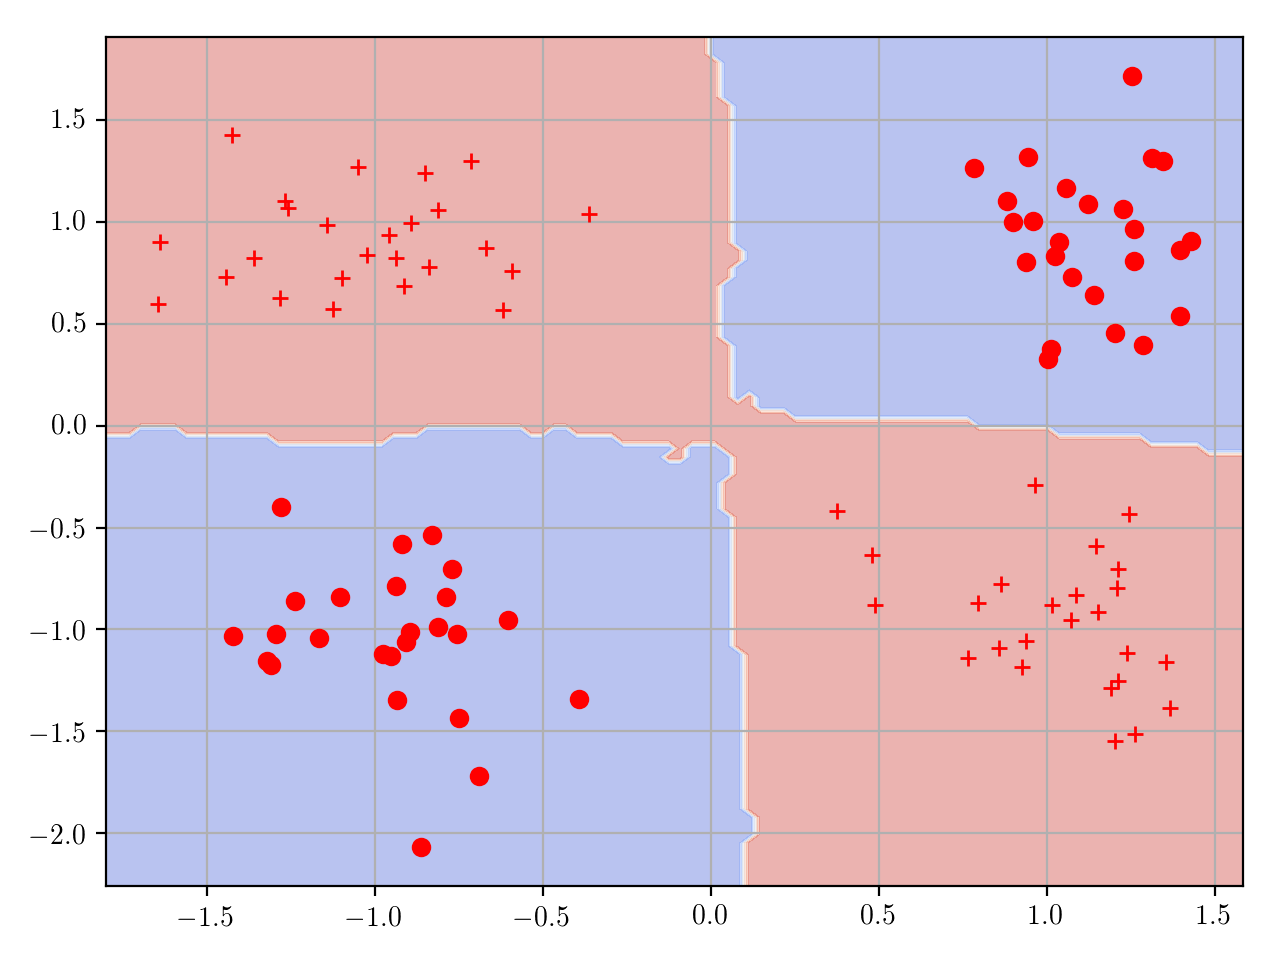

/Users/kyunghyuncho/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:5: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
/Users/kyunghyuncho/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:11: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
/Users/kyunghyuncho/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  from ipykernel import kernelapp as app
/Users/kyunghyuncho/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:18: Matplot

In [28]:
plot.figure()

vis_data(x_tra, y_tra, c='r')

plt1 = vis_decision_boundary('k--')

plot.show()
plot.tight_layout()

In [29]:
plot.savefig('../figures/knn_k{}.pdf'.format(k), dpi=100)

In [10]:
tra_er = numpy.sum(numpy.abs(knn_classify(x_tra, x_tra, y_tra, metric, k) - y_tra)) / numpy.float(len(y_tra))
tes_er = numpy.sum(numpy.abs(knn_classify(x_tes, x_tra, y_tra, metric, k) - y_tes)) / numpy.float(len(y_tes))

print 'Training error rate {}, Test error rate {}'.format(tra_er, tes_er)

Training error rate 0.0, Test error rate 0.0
